## Section B. Prediction Uncertainty with Bootstrapping

## Question 3 [Bootstrapping, 25 Marks]

### 1. Bootstrapping for KNN regression 

#### Load libraries

In [20]:
# libraries
library(ggplot2)


#### Knn function & Error function

In [30]:
# KNN function (distance = manhattan)
knn <- function(train.data, train.label, test.data, K=K, distance = 'manhattan'){
    ## count number of train samples
    train.len <- nrow(train.data)
    
    ## count number of test samples
    test.len <- nrow(test.data)

    ## calculate distances between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
    
    ## for each test sample...
    for (i in 1:test.len){
        ### ...find its K nearest neighbours from training sampels...
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]

        ###... and calculate the predicted values according to average.
        test.label[i]<- sum(train.label[nn])/K
    }
    
    ## return the predictions as output
    return (test.label)
}

# error function: root mean square error
RMSE <- function(predicted, target) {
    se <- 0
    for (i in 1:length(predicted)) {
        se <- se + (predicted[i]-target[i])^2
    }
    return (sqrt(se/length(predicted)))
}

#### Boot function

In [31]:
# define a function that generates sample indixes based on bootstrap technique
boot <- function (original.size, sample.size = N, times = L){
    indx <- matrix(nrow=times, ncol=sample.size)
    for (t in 1:times){
        indx[t, ] <- sample(x=original.size, size=sample.size, replace = TRUE)
    }
    return(indx)
}

### 2. Apply bootstrapping with times = 30, size = 60 and change K=1:20

#### Import data

In [32]:
# read train and test data
train_1b <- read.csv("Task1B_train.csv")
test_1b <- read.csv("Task1B_test.csv")

In [33]:
# create train and test subsets
train.data <- train_1b[,-5]
train.label <- train_1b[,5]
test.data <- test_1b[,-5]
test.label <- test_1b[,5]

In [34]:
# initialize the parameters
K <- 20           # Maximum K for KNN 
L <- 30          # number of datasets
N <- 60          # size of datasets

# generate bootstrap indices:
boot.indx <- boot(nrow(train.data), N, L)

# a dataframe to track the RMSE in each case
RMSE_boot <- data.frame('K'=1:K, 'L'=1:L, 'test'=rep(0,L*K))

## apply bootstrapping for every k values:
for (k in 1: K){
    
    ### for every dataset sizes:
    for (l in 1:L){
        
        #### calculate iteration index i
        i <- (k-1)*L+l
        
        #### save sample indices that were selected by bootstrap
        indx <- boot.indx[l,]
        
        #### save the value of k and l
        RMSE_boot[i,'K'] <- k
        RMSE_boot[i,'L'] <- l
        
        #### calculate and record the test RMSE
        RMSE_boot[i,'test'] <-  RMSE(knn(train.data[indx, ], train.label[indx], test.data, K=k), test.label)
    } 
}

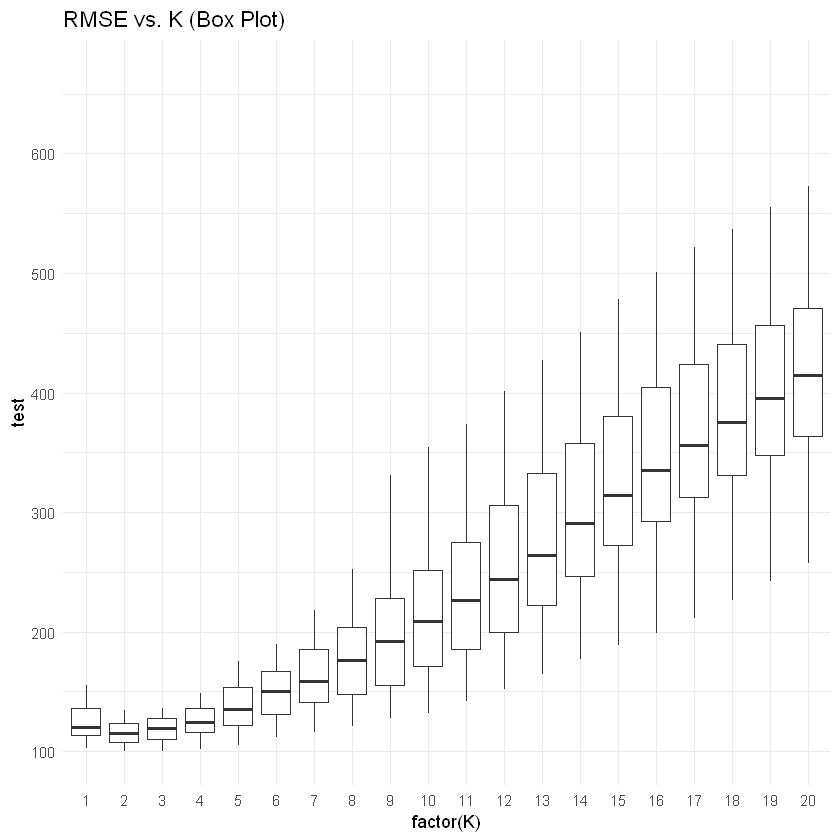

In [35]:
# modified the code from acitivity 1.2 and draw boxplot of RMSE of bootstrapped knn
ggplot(data=RMSE_boot, aes(factor(K),test)) + geom_boxplot(outlier.shape = NA)  + 
    scale_color_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('RMSE vs. K (Box Plot)') + theme_minimal()
# ignore the warnings (because of ignoring outliers)
options(warn=-1)

### 3. Discuss how test error and its uncertainty behave as K increases

The boxplot shows:
- test error increase as k increases
- uncertainty increase as k increases
- test error is minimum at k = 2

The boxplot indicates a positive correlation between the k value and test error. Generally, we expect the plot to form a parabola shape with high test errors on both low k values and high k values. Normally, a small k value leads to overfitting and increase the test error. In this case, as the dataset is not large enough, the test error is relatively small when k value is small. 

In terms of uncertainty, the size boxplot increases when k increases, indicates the variance of error increases and thus leads to a larger uncertainty. 

There is one thing to notice that at k = 1, the uncertainty and test error is higher than k = 2 & 3. This matches with our expectation because at k = 1, the model is highly overfitted, which should have a high test error and high variance.

If a optimal k value need to be selected based on the plot, k = 2 should be the optimal k value where the test error is the smallest and the uncertainty is small too.

### 4. Bootstrapping for KNN regression with K=5,times = 50 and change sizes = 5, 10, 15,..., 75 


In [53]:
# initialize the parameters
K <- 5           # Maximum K for KNN 
L <- 50          # number of datasets
N <- c(5,10,15,20,25,30,35,40,45,50,55,60,65,70,75)  # size of datasets

# a dataframe to track the RMSE in each size
RMSE_size <- data.frame('size'= rep(0, L*K*15), 'error'=rep(0,L*K*15))

for (n in N){
    # generate bootstrap indices:
    boot.indx <- boot(nrow(train.data), n, L)

    # a dataframe to track the RMSE in each case
    RMSE_case <- data.frame('size'= rep(0, L*K), 'error'=rep(0,L*K))
    
    ## apply bootstrapping for every k values:

    for (k in 1: K){

        ### for every dataset sizes:
        for (l in 1:L){

            #### calculate iteration index i
            i <- (k-1)*L+l

            #### save sample indices that were selected by bootstrap
            indx <- boot.indx[l,]

            #### save the value of k and l
            RMSE_case[i,'size'] = n 

            #### calculate and record the test RMSE
            RMSE_case[i,'error'] <-  RMSE(knn(train.data[indx, ], train.label[indx], test.data, K=k), test.label)
        }
        # update to RMSE VS SIZE table
        RMSE_size <- rbind(RMSE_size, RMSE_case)
    }
}

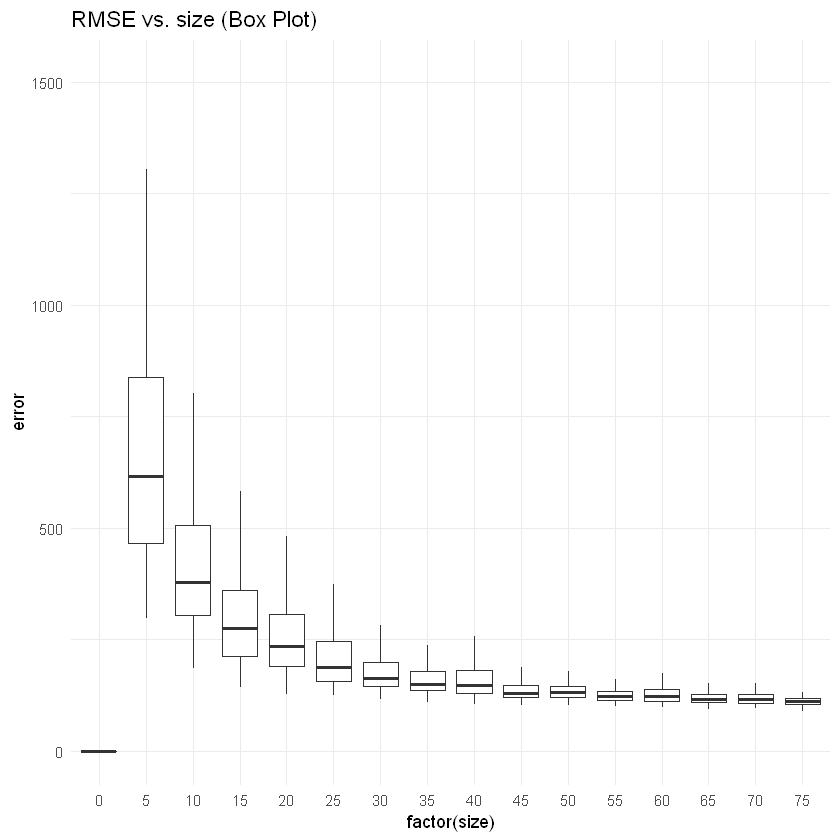

In [55]:
# modified the code from acitivity 1.2 and draw boxplot of RMSE of bootstrapped knn
ggplot(data=RMSE_size, aes(factor(size),error)) + geom_boxplot(outlier.shape = NA)  + 
    scale_color_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('RMSE vs. size (Box Plot)') + theme_minimal()

# ignore the warnings (because of ignoring outliers)
options(warn=-1)

### 5. Discuss how test error and its uncertainty behave as size increases

The boxplot shows:
- test error decreases as sample size increases
- the variance of error decreases as sample size increases

Looking at the test error represented by the boxplots, the boxplots tends to have a very long tail on the upper side indicates high test error. This matches the expection that for bootstrapped knn regression with a small sample size, both the variance and test error is high. Large variance indicates a high uncertainty of the model prediction. The plot illustrates the idea that uncertainty and error can be reduced by increasing the size of data training. With a larger data base, the values contained in the data is more likely be able to repsent the whole population. Thus, the model trained can be more generalized and performance measure is more accurate with a smaller variance.